<a href="https://colab.research.google.com/github/Christina-26/Marvel-tasks-level-1/blob/main/Task_4_Linear_and_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between a dependent variable and one or more independent features. When the number of the independent feature, is 1 then it is known as Univariate Linear regression, and in the case of more than one feature, it is known as multivariate linear regression. The goal of the algorithm is to find the best linear equation that can predict the value of the dependent variable based on the independent variables.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#variables to store mean and standard deviation for each feature
mu = []
std = []

**Data:**
This is a simple dataset containing housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.



In [86]:
def load_data(filename):
    df = pd.read_csv(filename, sep="," , index_col=False)
    df.columns = ["housesize", "rooms", "price"]
    data = np.array(df, dtype=float)
    plot_data(data[:, :2], data[:, -1])
    normalize(data)
    return data[:, :2], data[:, -1]

**Plotting the data**:
One way we can prove why using linear regression will work for our current dataset is by plotting it.

In [87]:
def plot_data(x, y):
    plt.xlabel('house size')
    plt.ylabel('price')
    plt.plot(x[:, 0], y, 'bo')
    plt.show()

**Normalize the data**:
The above code not only loads the data but also normalizes it and plots the data points.

In [88]:
def normalize(data):
    for i in range(data.shape[1] - 1):
        data[:, i] = ((data[:, i] - np.mean(data[:, i])) / np.std(data[:, i]))
        mu.append(np.mean(data[:, i]))
        std.append(np.std(data[:, i]))

**Hypothesis:**
Our dataset however has only 2 features, so for our current problem the hypothesis is:

hθ(x) = θ0 + θ1x1 + θ2x2

where x1 and x2 are the two features (i.e. size of house and number of rooms). Lets put this in a simple python function which returns the hypothesis:

In [89]:
def h(x, theta):
    return np.matmul(x, theta)

**Cost Function**
To evaluate the quality of our model we make use of the cost function.

In [90]:
def cost_function(x, y, theta):
    return ((h(x, theta) - y).T @ (h(x, theta) - y)) / (2 * y.shape[0])

**Gradient Descent**
Gradient descent in our context is an optimization algorithm that aims to adjust the parameters in order to minimize the cost function .

In [91]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []

    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1 / m) * (x.T @ (h_x - y))
        theta = theta - (learning_rate) * cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all

**Putting it together**
We first call the load_data function to load the x and y values. x contains the training examples and y contains the labels (the house prices in our case).

In [92]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(range(num_epochs), J_all, 'm', linewidth="5")
    plt.show()

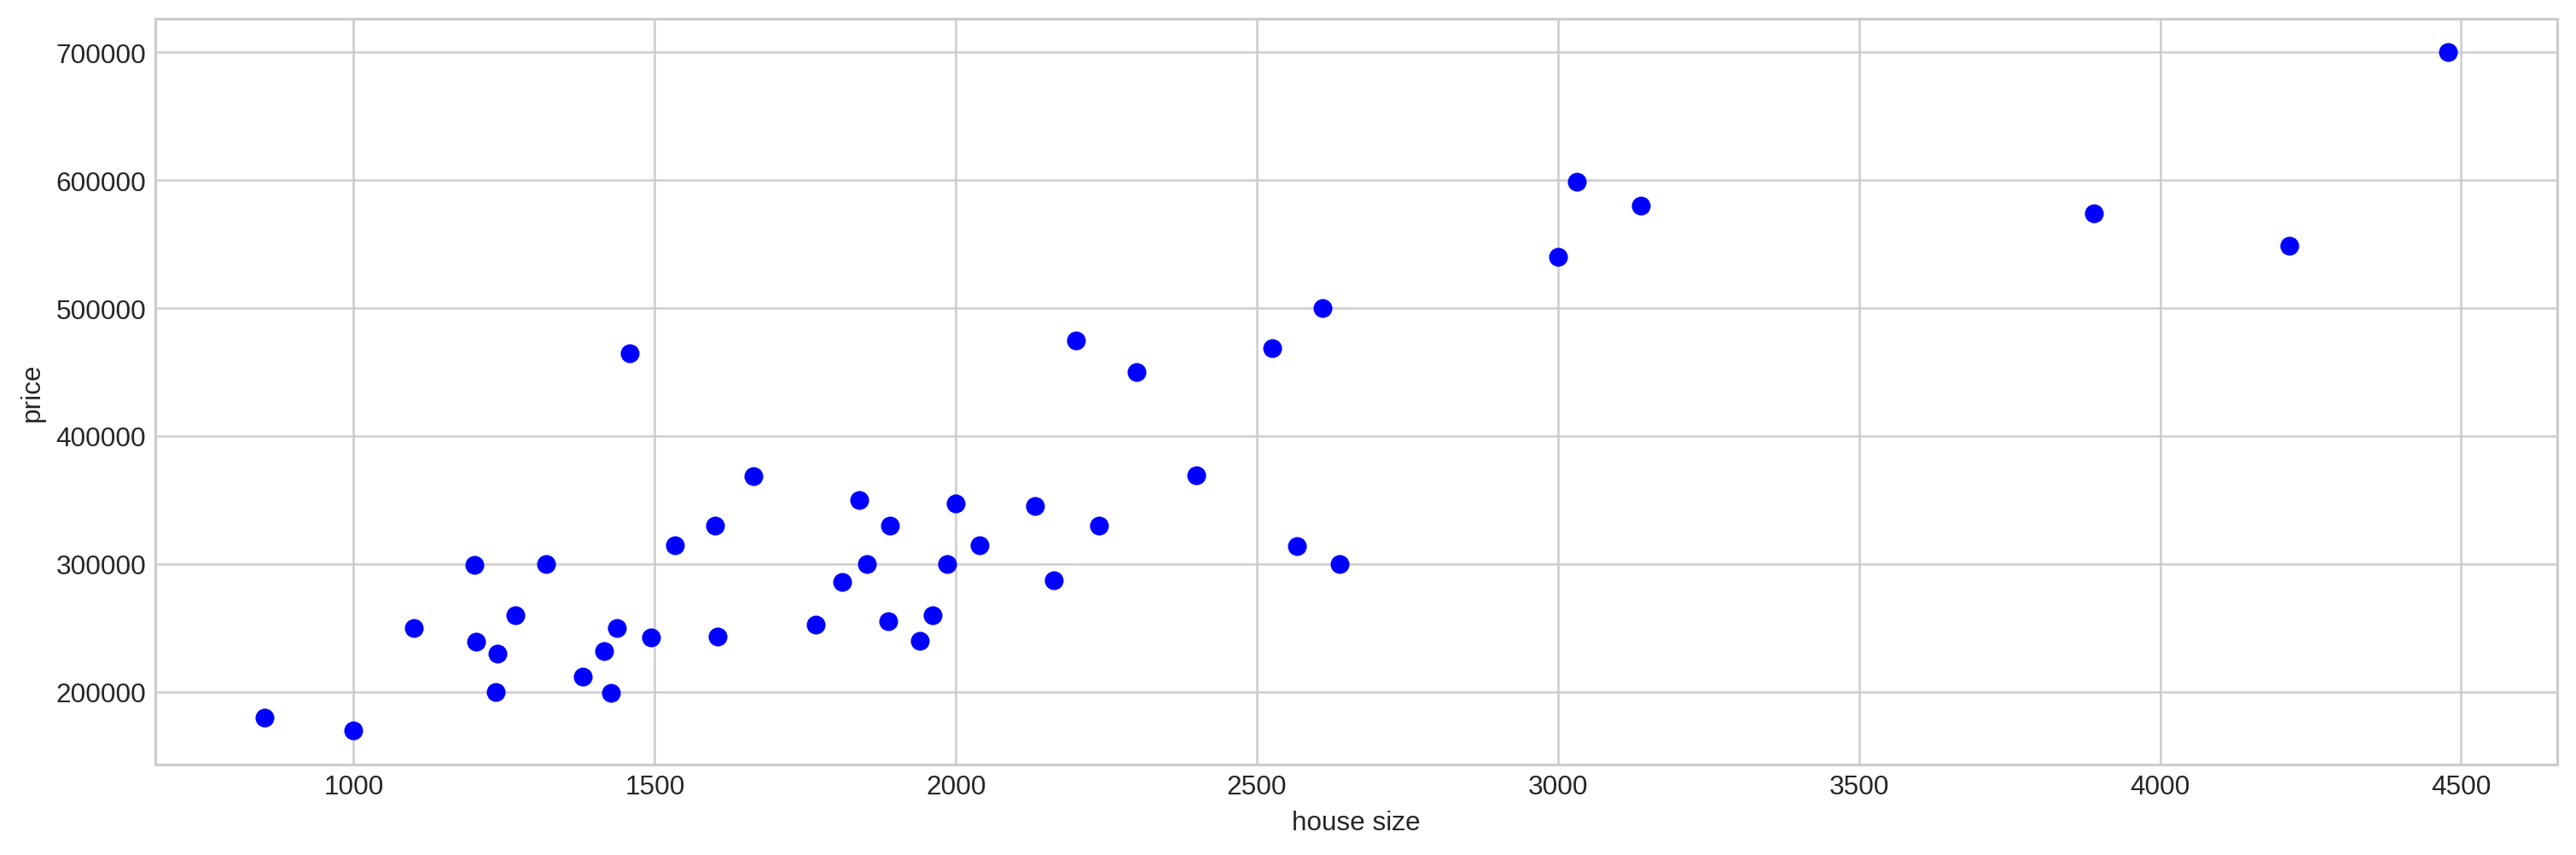

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


In [93]:
x, y = load_data("house_price_data.txt")
y = np.reshape(y, (46, 1))
x = np.hstack((np.ones((x.shape[0], 1)), x))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

**Testing the code** calling a test function that will take as input the size of the house, the number of rooms and the final theta vector that was returned by our linear regression model and will give us the price of the house.

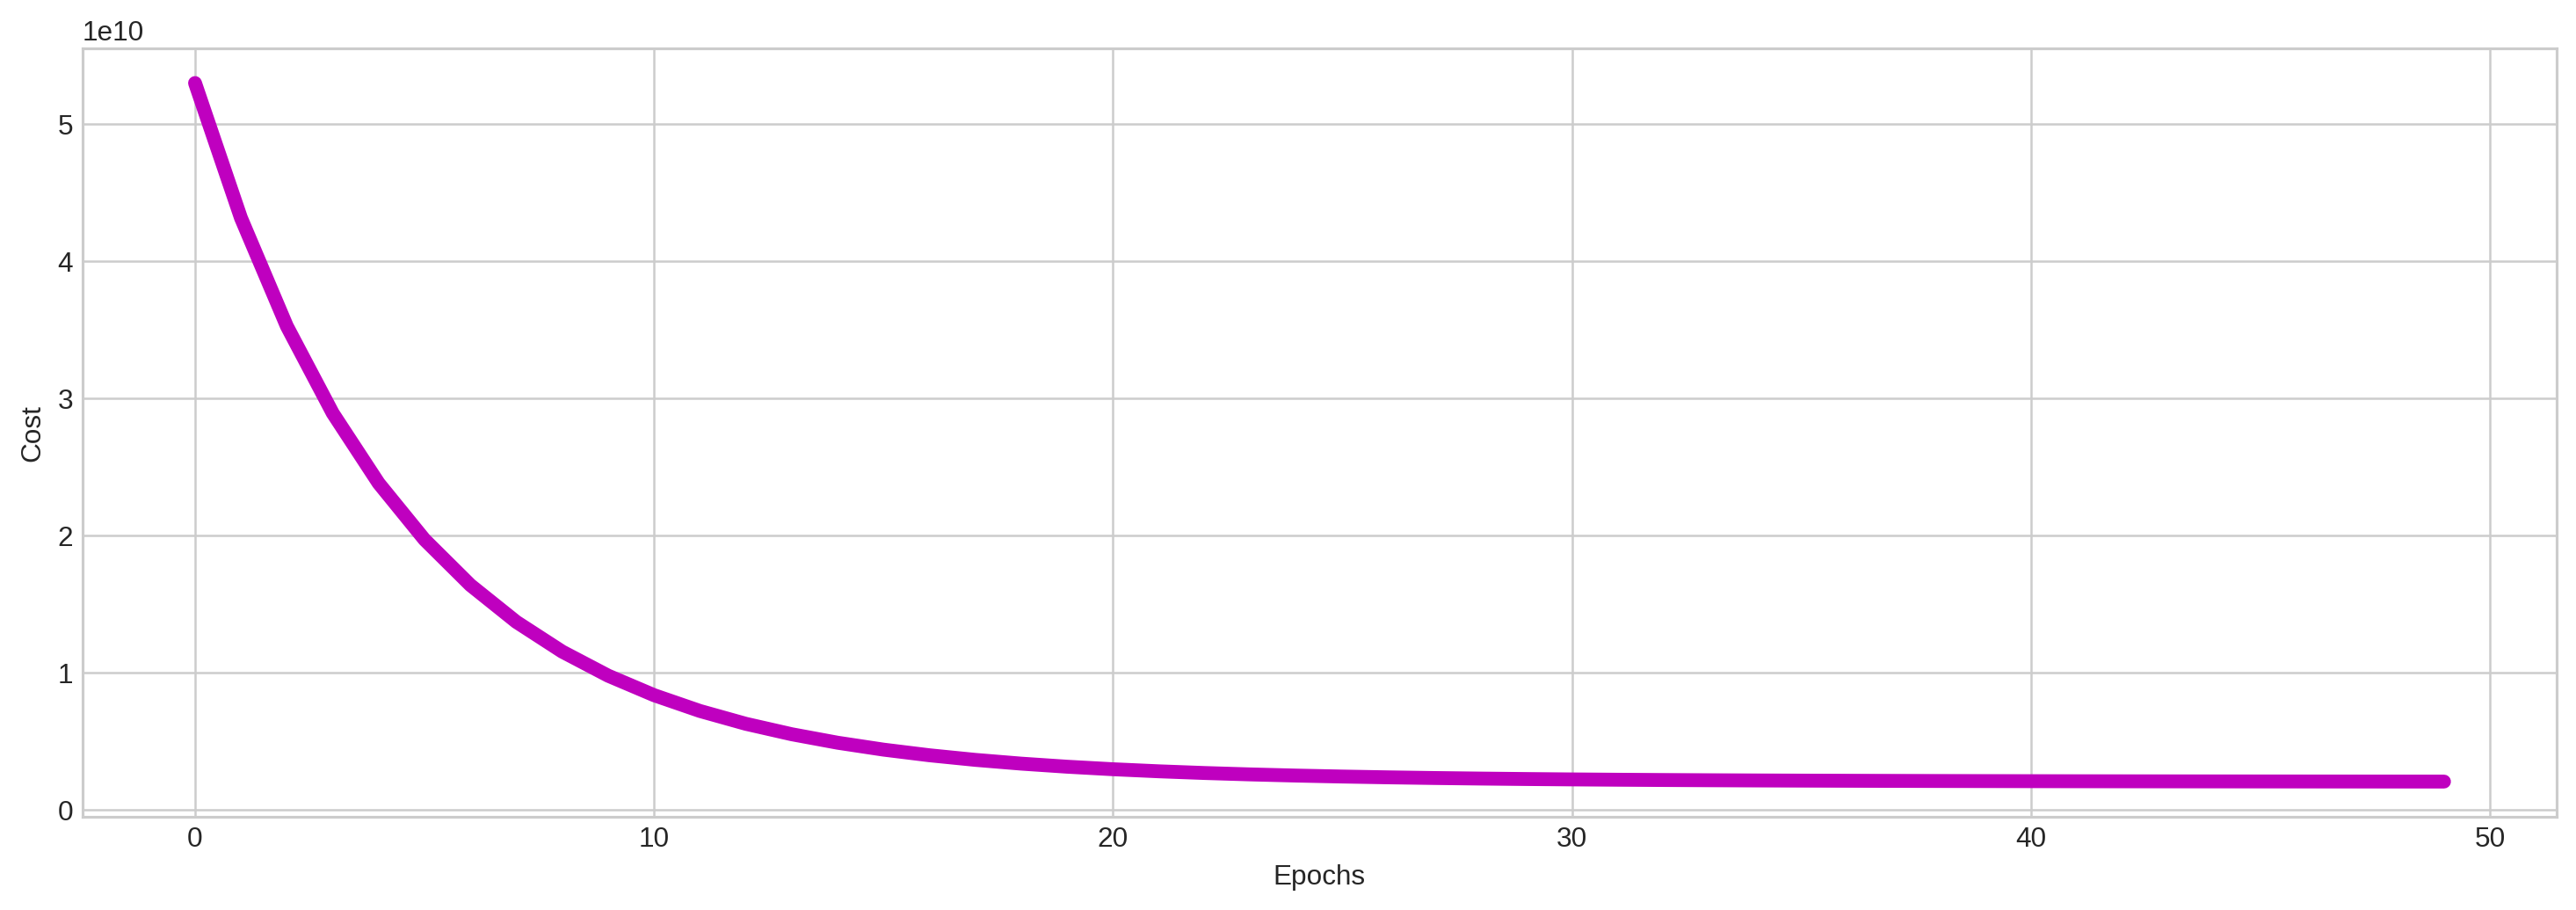

Price of house:  [1.66842816e+08]


In [94]:
def test(theta, x):
    x[0] = (x[0] - mu[0]) / std[0]
    x[1] = (x[1] - mu[1]) / std[1]

    y = theta[0] + theta[1] * x[0] + theta[2] * x[1]
    print("Price of house: ", y)

# For testing and plotting cost
n_epochs = list(range(num_epochs))
jplot = [i[0][0] for i in J_all]
plot_cost(jplot, num_epochs)

test(theta, [1600, 3])


**Linear Regression vs. Logistic Regression**

A line can be represented via the slop-intercept form as follows: y=mx+b

Here, m represents the slope and b the y-intercept.

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.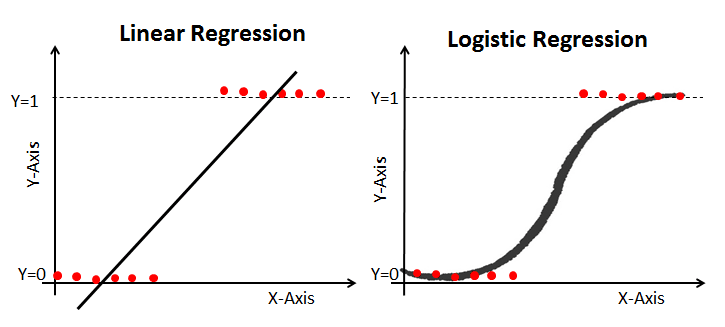

**Sigmoid functions**
At the very heart of Logistic Regression is the so-called Sigmoid function. A Sigmoid function is a class of functions which follows an S-shape when plotted.
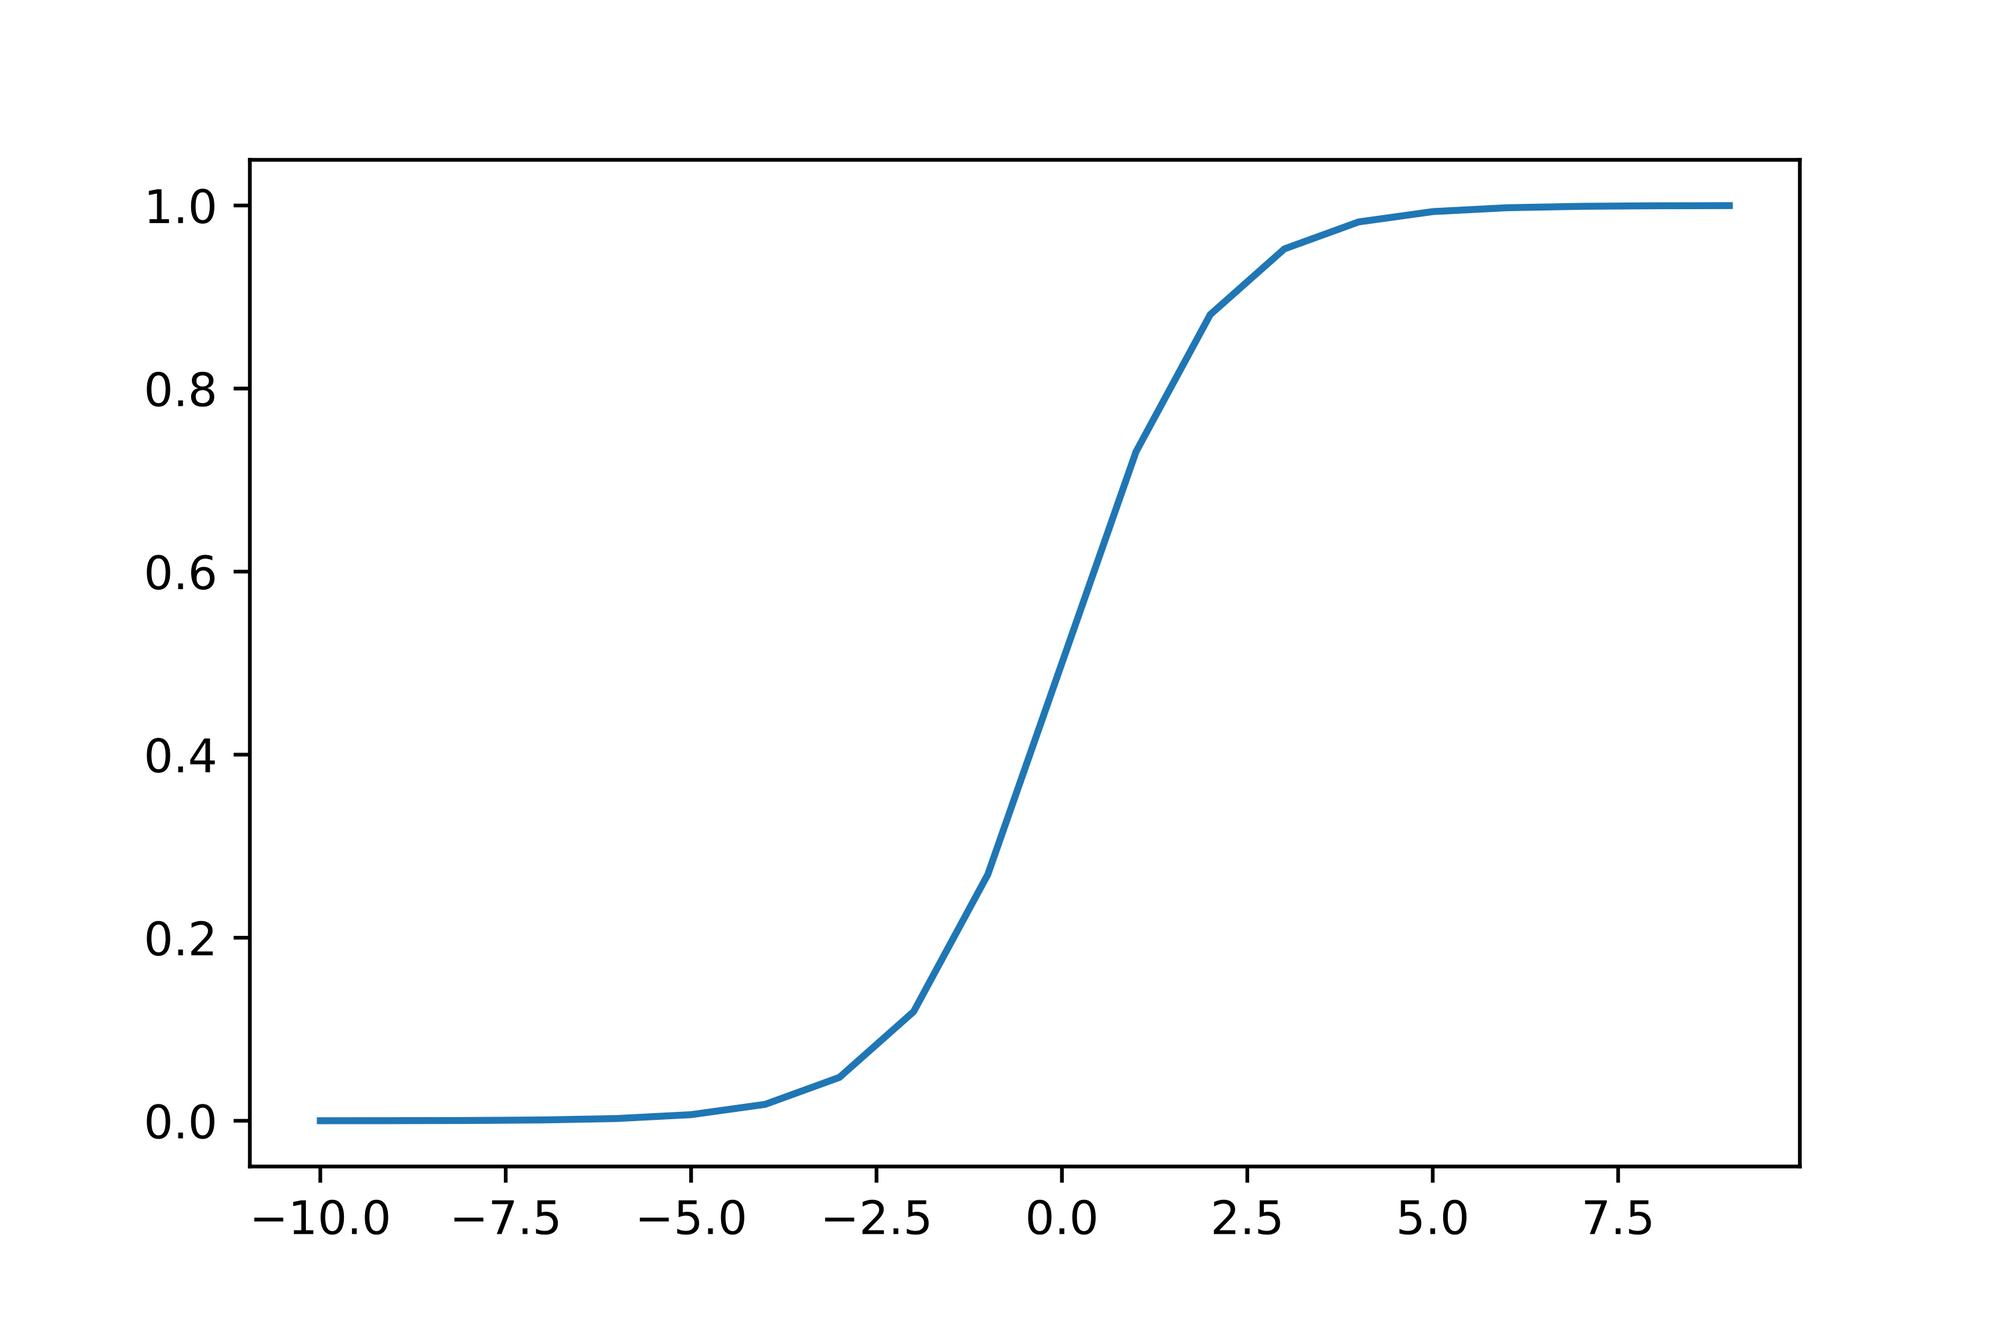

We are going to build our own logistic regression model from scratch using Gradient Descent. To test our model we will use “Breast Cancer Wisconsin Dataset” from the sklearn package and predict if the lump is benign or malignant with over 95% accuracy.

In [95]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
from numpy import log, dot, e
from numpy.random import rand
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [96]:
#BREAST CANCER DATASET
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']
feature_names = load_breast_cancer()['feature_names']

<ipython-input-97-225788b262fa>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


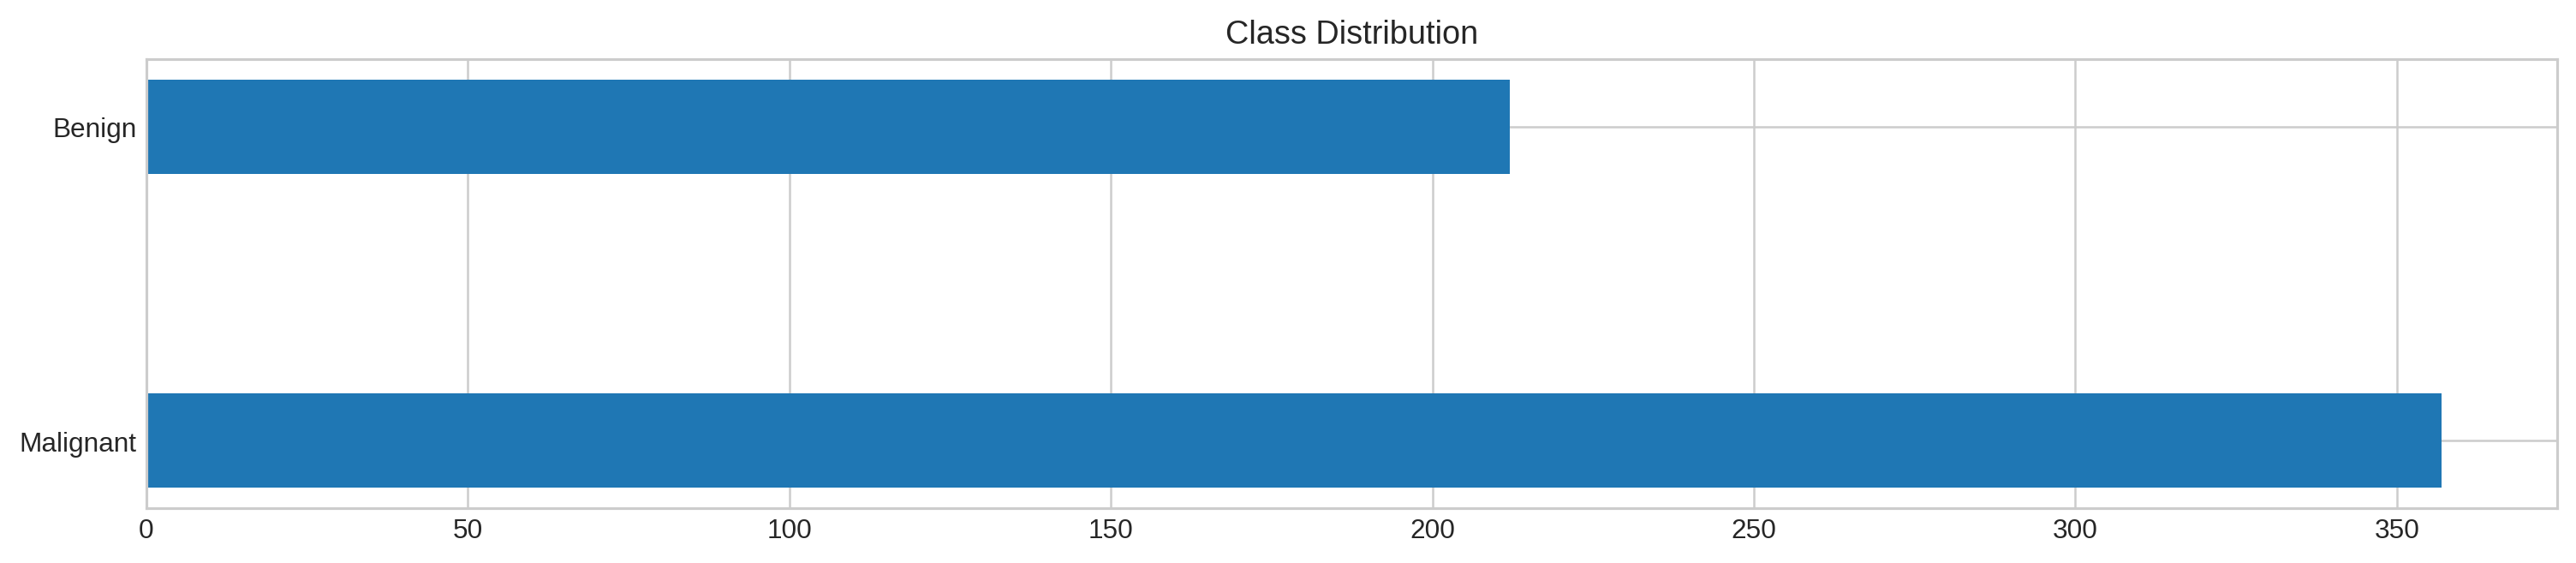

In [97]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,3)
plt.barh(['Malignant','Benign'],[sum(y), len(y)-sum(y)], height=0.3)
plt.title('Class Distribution')
plt.show()

<ipython-input-98-8f78933f3ed8>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


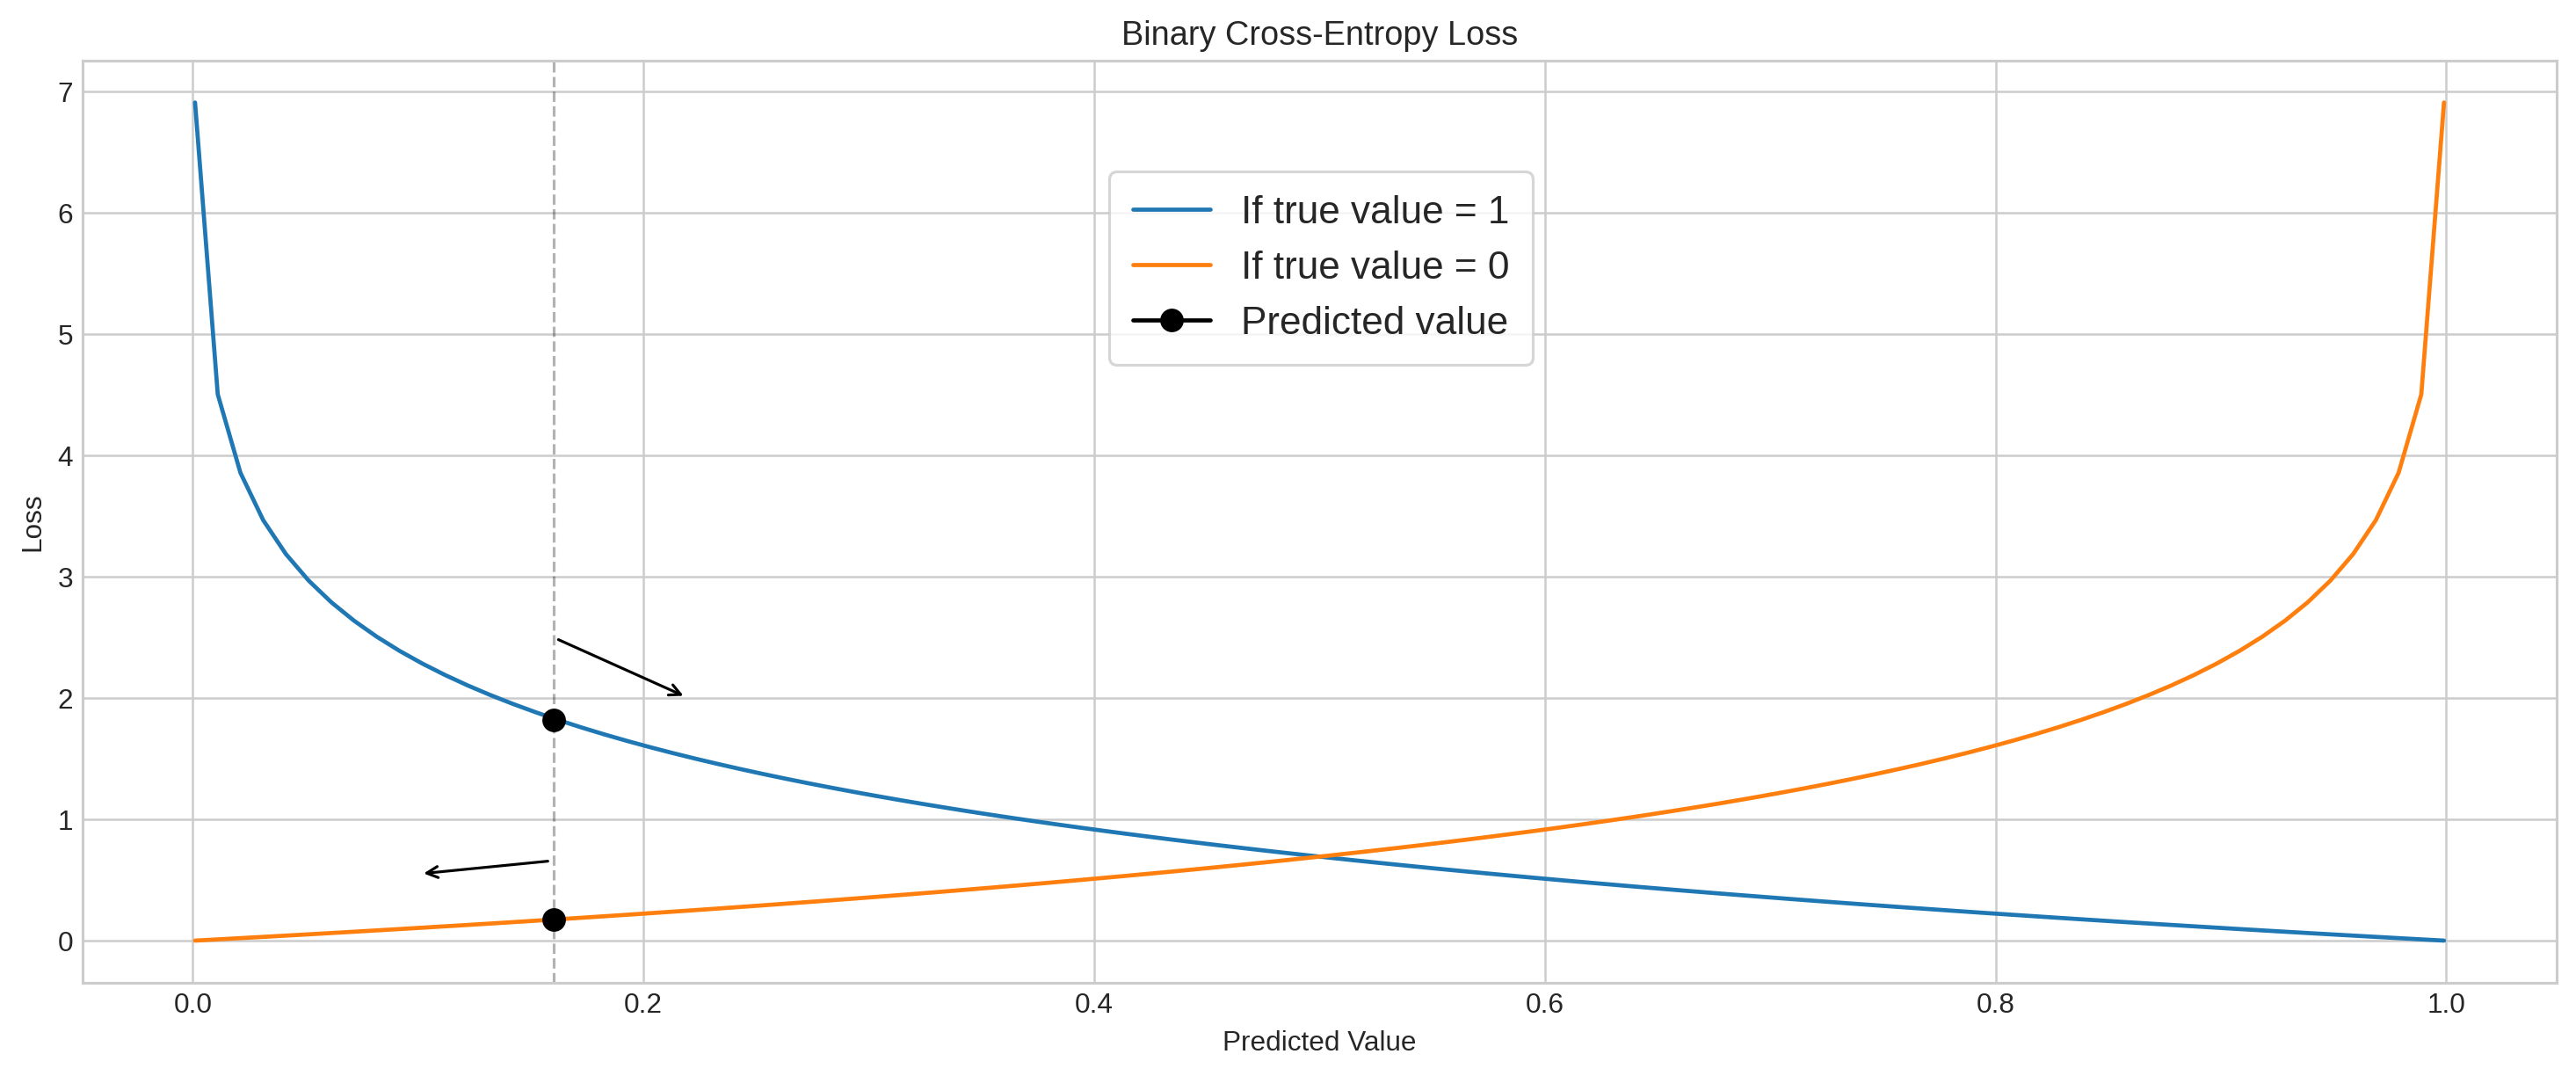

In [98]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,6)

#plt.subplot(121)
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 1')
plt.plot(np.linspace(0.001, 0.999, 100), [abs(np.log(1 - i)) for i in np.linspace(0.001, 0.999, 100)], label='If true value = 0')

plt.plot(0.16, 1.818352371073392, marker='.', markersize=15, c='k', label='Predicted value')
plt.plot(0.16, 0.17708679723835707, marker='.', markersize=15, c='k')

plt.axvline(0.16, c='k', alpha=0.3, ls='--', lw=1)

plt.annotate("", xy=(0.22, 2), xytext=(0.16, 2.5), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=(0.1, 0.55), xytext=(0.16, 0.66), arrowprops=dict(arrowstyle="->"))

plt.legend(loc=(0.415,0.67), frameon=True, fontsize=14, borderpad=.6)
plt.title('Binary Cross-Entropy Loss')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.show()

In [99]:
pd.DataFrame(np.concatenate((X, y[:, None]), axis=1), columns=np.append(feature_names, 'Target')).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [100]:
#SCALING
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

In [101]:
#Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [102]:
#Logistic Regression
class LogisticRegression:

    def sigmoid(self, z): return 1 / (1 + e**(-z))

    def cost_function(self, X, y, weights):
        z = dot(X, weights)
        predict_1 = y * log(self.sigmoid(z))
        predict_0 = (1 - y) * log(1 - self.sigmoid(z))
        return -sum(predict_1 + predict_0) / len(X)

    def fit(self, X, y, epochs=25, lr=0.05):
        loss = []
        weights = rand(X.shape[1])
        N = len(X)

        for _ in range(epochs):
            # Gradient Descent
            y_hat = self.sigmoid(dot(X, weights))
            weights -= lr * dot(X.T,  y_hat - y) / N
            # Saving Progress
            loss.append(self.cost_function(X, y, weights))

        self.weights = weights
        self.loss = loss

    def predict(self, X):
        # Predicting with sigmoid function
        z = dot(X, self.weights)
        # Returning binary result
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [103]:
#Predictions
logreg = LogisticRegression()
logreg.fit(X_train, y_train, epochs=500, lr=0.5)
y_pred = logreg.predict(X_test)

In [104]:
#Evaluation
print(classification_report(y_test, y_pred))
print('-'*55)
print('Confusion Matrix\n')
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

-------------------------------------------------------
Confusion Matrix

[[ 63   4]
 [  3 118]]


<ipython-input-105-2cff267aad57>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


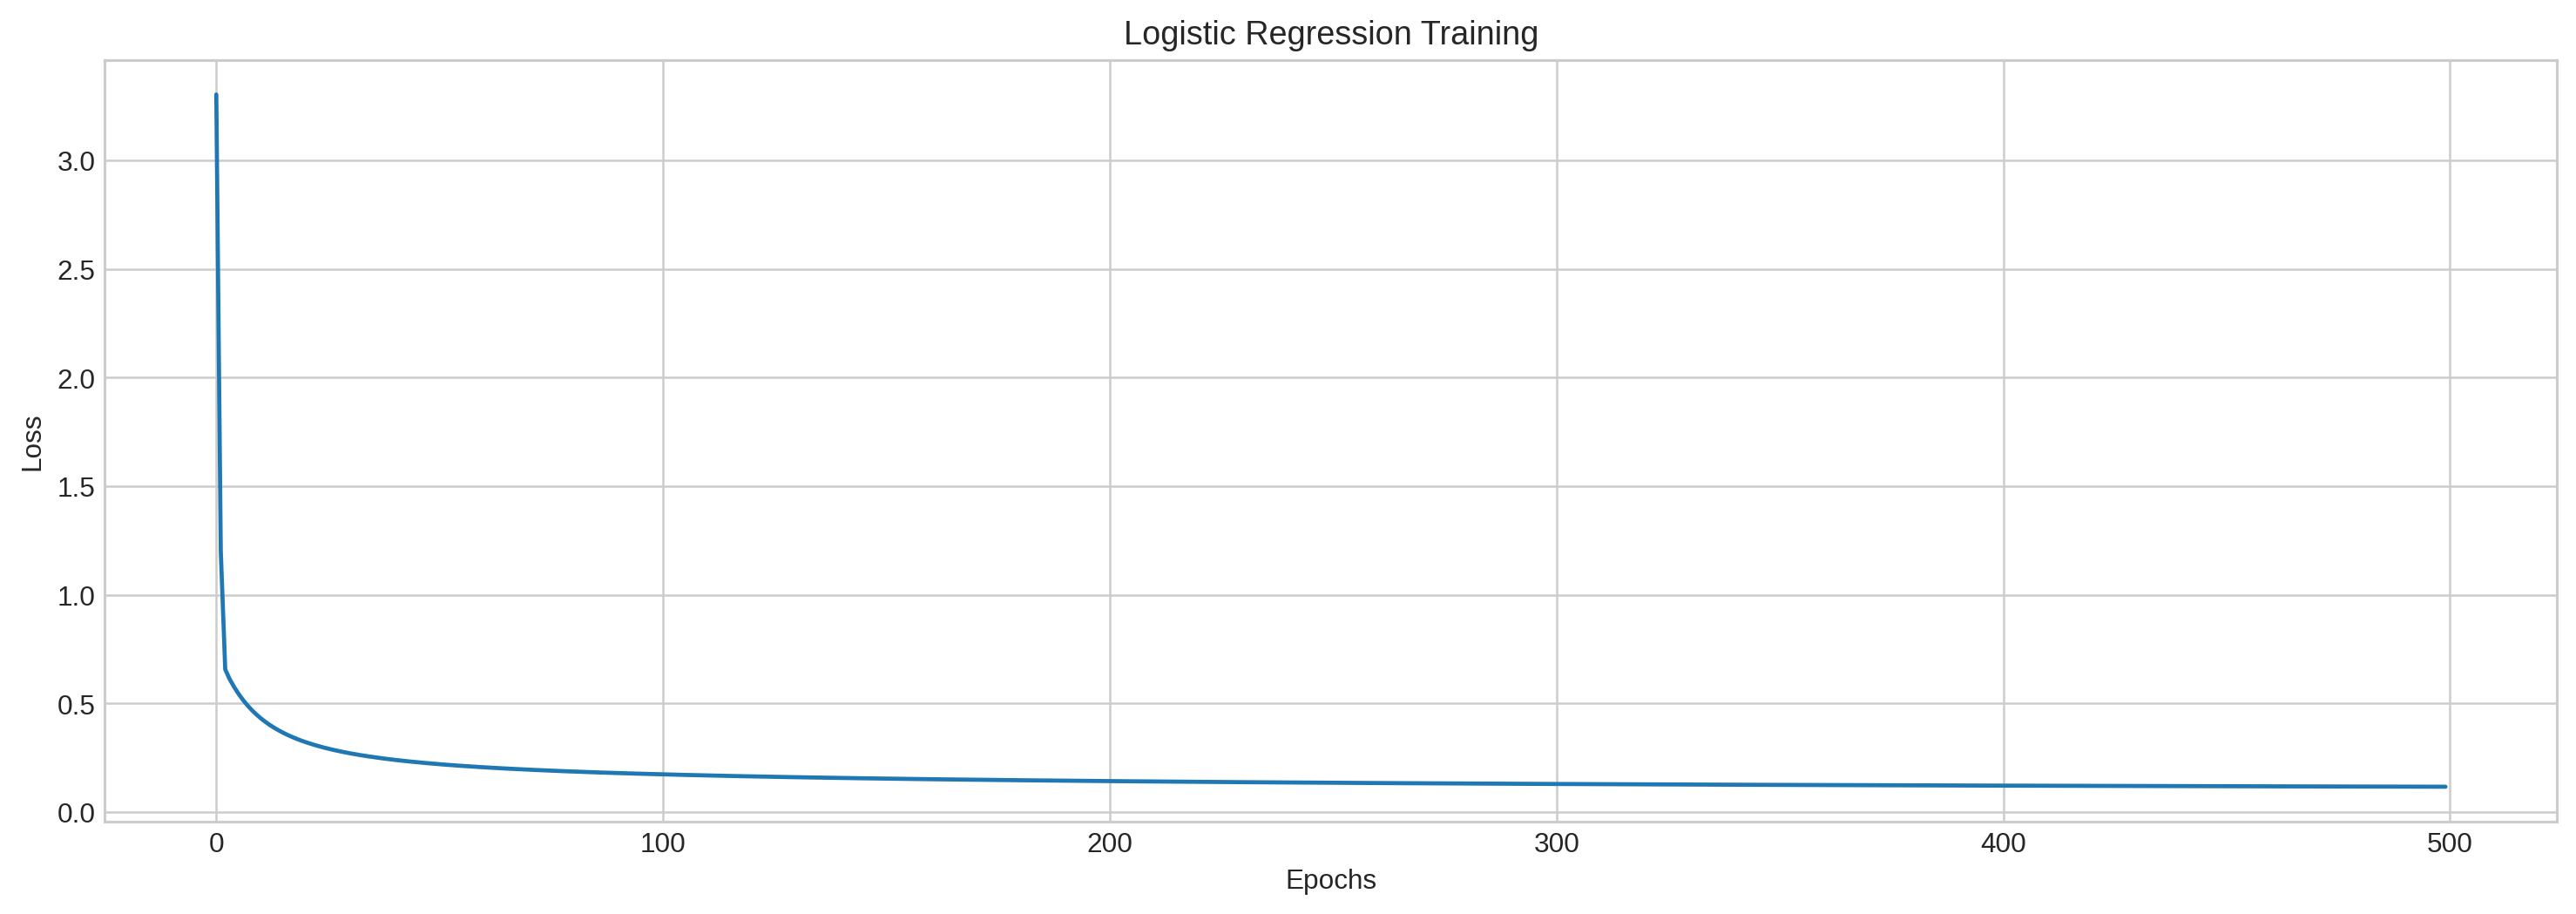

In [105]:
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 227
plt.rcParams['figure.figsize'] = (16,5)
plt.plot(logreg.loss)
plt.title('Logistic Regression Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()